# Graded Assignment on Python Programming

# 1. Data Ingestion & Quality Profiling

In [5]:
import pandas as pd
import numpy as np

1.1 Load and Inspect

In [16]:
#Loading the Dataset

df = pd.read_csv(r'C:\Users\HP\URBICA DATA ANALYTICS\Python_HV\Dataset-Pyhton-001\Dataset\car_prices.csv')

In [17]:
# displaying first 5 Rows
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [18]:
#Displaying data types and record count(non-null counts)

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


1.2 Understanding the Data Structure

In [19]:
# Checking the shape of the dataset (rows and columns)

df.shape

(558837, 16)

In [20]:
# Displaying column names and their data types

df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

1.3 Missing & Anomaly Detection 

In [21]:
# Nulls Per Column
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [14]:
# Visualizing the Missing Data
import matplotlib.pyplot as plt

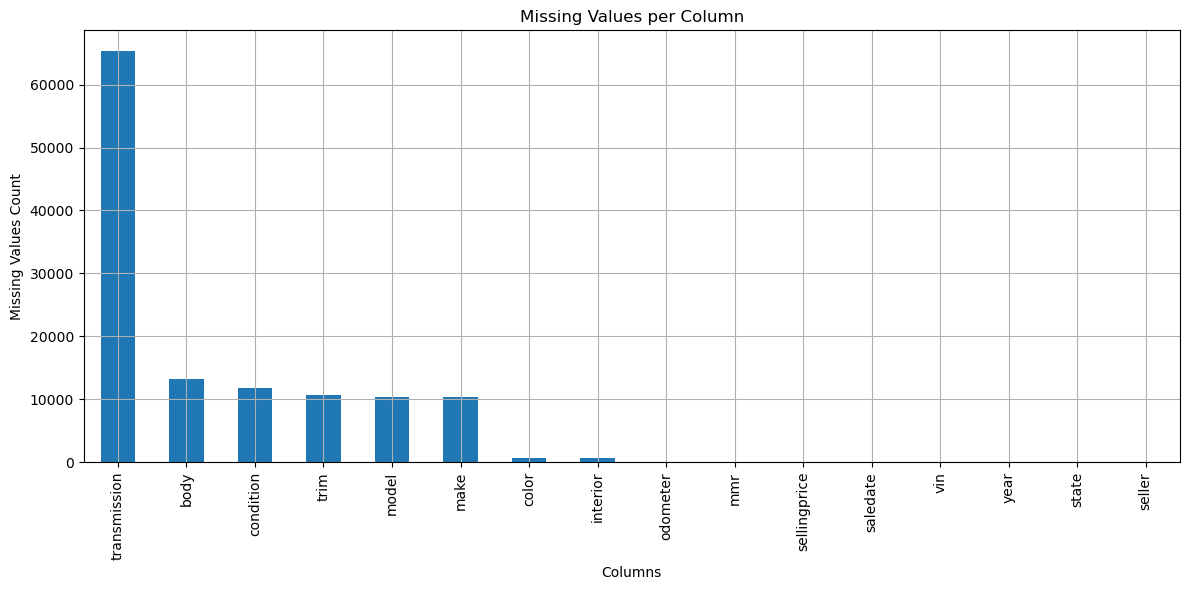

In [22]:
#Bar Chart for Null Count

df.isnull().sum().sort_values(ascending=False).plot(kind='bar', figsize=(12,6), title='Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
#Resloving null values
#Filling missing Categorical values

cat_columns = ['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior']
df[cat_columns] = df[cat_columns].fillna('Unknown')

In [24]:
#Filling missing numeric values with median

num_columns = ['condition', 'odometer', 'mmr', 'sellingprice']
for col in num_columns:
    df[col] = df[col].fillna(df[col].median())

In [25]:
#Checking if there are any missing values left

df.isnull().sum()

year             0
make             0
model            0
trim             0
body             0
transmission     0
vin              4
state            0
condition        0
odometer         0
color            0
interior         0
seller           0
mmr              0
sellingprice     0
saledate        12
dtype: int64

In [27]:
#As there are missing values in vin and saledate columns, we'll fill them with 'Unknown'

df['vin'] = df['vin'].fillna('Unknown')
df['saledate'] = df['saledate'].fillna('Unknown')

In [28]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [29]:
#Count number of duplicate records
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


There are no Duplicate Rows

# 2. Data frames Queries

2.1 Calculation of Average, Maximum and Minimum Car price

In [30]:
avg_price = df['sellingprice'].mean()
min_price = df['sellingprice'].min()
max_price = df['sellingprice'].max()

In [31]:
print(f"Average Price: {avg_price}")
print(f"Minimum Price: {min_price}")
print(f"Maximum Price: {max_price}")

Average Price: 13611.326356343621
Minimum Price: 1.0
Maximum Price: 230000.0


2.2 Listing all the Unique colors of Cars

In [33]:
#Clean color column, remove extra spaces

df['color'] = df['color'].str.strip()

In [34]:
#Need to remove the values with only numbers or only special characters

df = df[~df['color'].str.match(r'^\d+$', na=False)]
df = df[df['color'] != '—']

In [35]:
#Display unique colors
print(df['color'].unique())

['white' 'gray' 'black' 'red' 'silver' 'blue' 'brown' 'beige' 'purple'
 'burgundy' 'gold' 'yellow' 'green' 'charcoal' 'Unknown' 'orange'
 'off-white' 'turquoise' 'pink' 'lime']


2.3 Finding the number of unique car brands and car models

In [36]:
#Count Unique brands

num_brands = df['make'].nunique()

In [37]:
#Count Unique models
num_models = df['model'].nunique()

In [39]:
print("Number of unique car brands:", num_brands)
print("Number of unique car models:", num_models)

Number of unique car brands: 97
Number of unique car models: 971


2.4 Finding the car information having selling prices greater than $165000

In [40]:
#Filtering rows where selling price > 165000
high_price_cars = df[df['sellingprice'] > 165000]

In [41]:
high_price_cars

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
125095,2012,Rolls-Royce,Ghost,Base,Sedan,automatic,sca664s58cux50727,fl,45.0,14316.0,black,beige,braman motorcars,154000.0,169500.0,Wed Jan 14 2015 01:40:00 GMT-0800 (PST)
344905,2014,Ford,Escape,Titanium,SUV,automatic,1fmcu9j98eua23833,mo,43.0,27802.0,green,tan,ford-lincoln dealer program,22800.0,230000.0,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
446949,2015,Mercedes-Benz,S-Class,S65 AMG,Sedan,automatic,wddug7kb2fa102347,ca,41.0,5277.0,white,white,mercedes-benz usa,170000.0,173000.0,Thu May 21 2015 05:00:00 GMT-0700 (PDT)
538347,2012,Rolls-Royce,Ghost,Base,sedan,automatic,sca664s59cux50803,ca,44.0,5215.0,white,tan,financial services remarketing (bmw int),166000.0,167000.0,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
545523,2013,Rolls-Royce,Ghost,Base,sedan,automatic,sca664s52dux52152,fl,42.0,7852.0,white,beige,flag/landrover southpointe,178000.0,171500.0,Wed Jun 17 2015 03:05:00 GMT-0700 (PDT)
548169,2011,Ferrari,458 Italia,Base,coupe,automatic,zff67nfa1b0178698,fl,46.0,12116.0,red,black,platinum motor cars,182000.0,183000.0,Wed Jun 17 2015 03:40:00 GMT-0700 (PDT)
557570,2012,Rolls-Royce,Ghost,EWB,sedan,automatic,sca664l50cux65625,ca,36.0,11832.0,white,black,bentley scottsdale,164000.0,169000.0,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)


    2.5 Top 5 most frequently sold car models

In [43]:
top_5_models = df['model'].value_counts().head(5)

In [44]:
top_5_models

model
Altima    18101
F-150     13346
Camry     12153
Fusion    10990
Escape    10434
Name: count, dtype: int64

2.6 Average selling price of cars by brand

In [45]:
#Grouping by 'make' and calculating the mean selling price
avg_price_by_make = df.groupby('make')['sellingprice'].mean().reset_index()

In [46]:
#Renaming the columns
avg_price_by_make.columns = ['Make', 'Average Selling Price']

In [47]:
#Displaying the average selling price
avg_price_by_make

,Make,Average Selling Price
0,Acura,14011.912118
1,Aston Martin,54554.166667
2,Audi,19530.764063
3,BMW,21125.005602
4,Bentley,73217.857143
...,...,...
92,subaru,3710.416667
93,suzuki,4810.000000
94,toyota,7339.105263
95,volkswagen,5465.217391


2.7 Minimum selling price of cars for each interior

In [48]:
#Grouping by 'interior' and calculating minimum selling price
min_price_by_interior = df.groupby('interior')['sellingprice'].min().reset_index()

In [49]:
#Renaming the columns for clarity
min_price_by_interior.columns = ['Interior', 'Minimum Selling Price']

In [50]:
#Displaying the minimum selling price
min_price_by_interior

,Interior,Minimum Selling Price
0,Unknown,225.0
1,beige,100.0
2,black,1.0
3,blue,150.0
4,brown,200.0
5,burgundy,175.0
6,gold,250.0
7,gray,1.0
8,green,100.0
9,off-white,900.0


2.8 Highest Odometer reading per year (descending order)

In [51]:
#Grouping by 'year' and getting the max odometer value for each year
Highest_odometer_per_year = df.groupby('year')['odometer'].max().reset_index()

In [52]:
#Sort by Odometer in descending Order
Highest_odometer_per_year = Highest_odometer_per_year.sort_values(by='odometer', ascending=False)

In [53]:
#Displaying the Highest Odometer reading
Highest_odometer_per_year

,year,odometer
17,1999,999999.0
31,2013,999999.0
29,2011,999999.0
28,2010,999999.0
27,2009,999999.0
26,2008,999999.0
25,2007,999999.0
24,2006,999999.0
23,2005,999999.0
22,2004,999999.0


2.9 Creating a new column for car age (assuming the current year is 2025)

In [54]:
df['car_age'] = 2025 - df['year']

In [55]:
#Displaying the first 5 rows to check
df[['year', 'car_age']].head()

,year,car_age
0,2015,10
1,2015,10
2,2014,11
3,2015,10
4,2014,11


    2.10 Number of cars with condition ≥ 48 and odometer > 90000

In [56]:
count_cars = df[(df['condition'] >= 48) & (df['odometer'] > 90000)].shape[0]

In [57]:
#Display the output
count_cars

718

2.11 Which state consistently has higher car prices for newer cars (year>2013)

In [58]:
#Filter for newer cars
newer_cars = df[df['year'] > 2013]

In [59]:
#Average selling price by state sorted in descending order
state_avg_price = newer_cars.groupby('state')['sellingprice'].mean().sort_values(ascending=False)

In [60]:
#Display the output
state_avg_price

state
oh    27507.366615
ab    25204.255319
nj    23707.794040
on    22967.526882
qc    22704.404145
pa    22042.979697
tn    21880.586719
mi    21435.971921
ca    20900.889138
wa    20635.986994
co    20501.018923
fl    20351.167751
ne    20005.963077
il    19999.456319
ga    19967.433339
nv    19824.253318
tx    19769.873912
ny    19733.001988
mo    19575.190000
mn    19570.785833
la    19171.536424
va    19134.971098
wi    19088.416303
az    18850.340136
ut    18849.693252
ns    18716.666667
hi    18063.157895
ma    17733.333333
md    17728.183230
nc    17356.759076
sc    17019.425141
or    16464.522822
ms    15989.310345
in    15585.145631
nm    15207.692308
pr    15022.413793
al    14900.000000
ok    10600.000000
Name: sellingprice, dtype: float64

2.12 For cars with excellent condition (top 20%), which makes have the lowest average price (value for money)

In [61]:
#Condition score threshold for the top 20%
condition_threshold = df['condition'].quantile(0.8)

In [62]:
#Cars in the top 20% condition
excellent_cars = df[df['condition'] >= condition_threshold]

In [63]:
#Grouping by 'make' and finding the average selling price, sorted in ascending order
Average_price = excellent_cars.groupby('make')['sellingprice'].mean().sort_values()

In [64]:
Average_price

make
Oldsmobile       2100.000000
Isuzu            3370.000000
honda            4233.333333
Saturn           5502.500000
chrysler         6033.333333
                   ...      
Tesla           68088.888889
Bentley         86992.647059
Lamborghini    112625.000000
Ferrari        139363.636364
Rolls-Royce    155050.000000
Name: sellingprice, Length: 79, dtype: float64

# 3. Data Visualization and insights

3.1 Correlation of all the features having numerical values

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
#Need to consider only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

In [68]:
#Compute the Correlation
corr_matrix = numeric_df.corr()

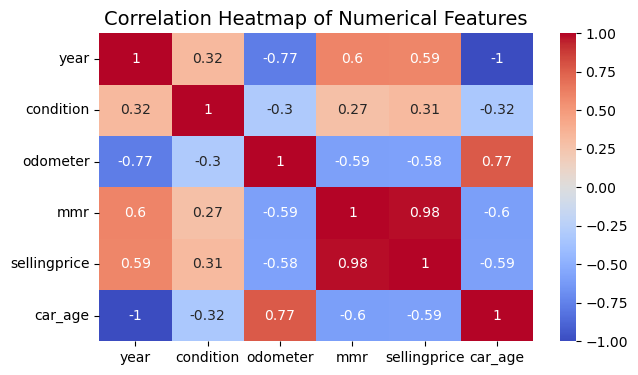

In [69]:
#Heatmap
plt.figure(figsize=(7, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

3.2 Average selling price by year

In [71]:
#Grouping by year and calculating average price
avg_price_by_year = df.groupby('year')['sellingprice'].mean().reset_index()

In [72]:
#Bar Chart
import matplotlib.pyplot as plt

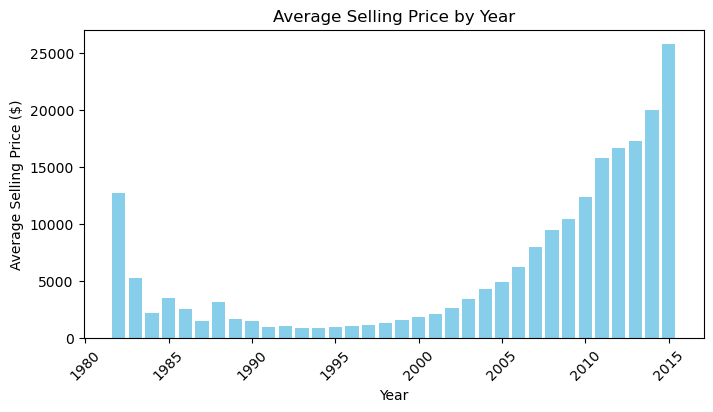

In [73]:
plt.figure(figsize=(8,4))
plt.bar(avg_price_by_year['year'], avg_price_by_year['sellingprice'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Average Selling Price ($)')
plt.title('Average Selling Price by Year')
plt.xticks(rotation=45)
plt.show()

3.3 Average selling price by odometer

In [75]:
import matplotlib.pyplot as plt

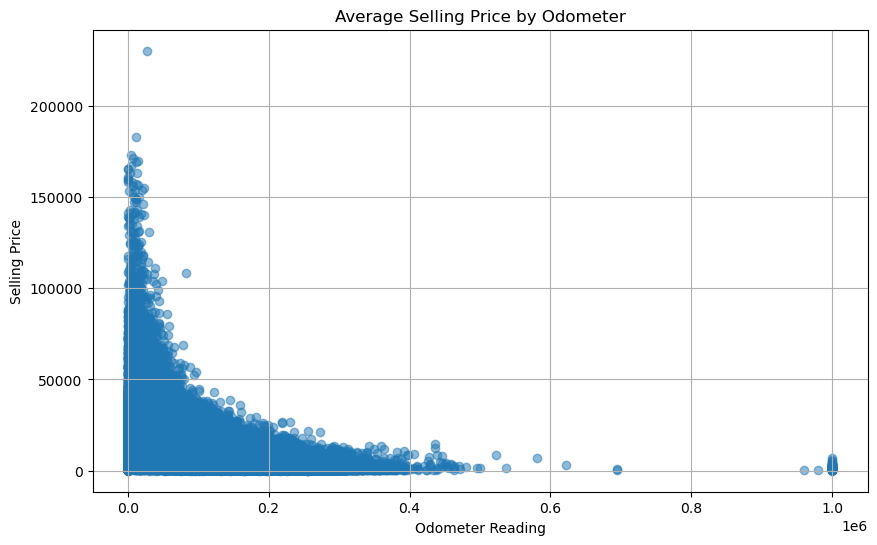

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(df['odometer'], df['sellingprice'], alpha=0.5)
plt.xlabel('Odometer Reading')
plt.ylabel('Selling Price')
plt.title('Average Selling Price by Odometer')
plt.grid(True)
plt.show()

It can be seen that the Cars with Low Odometer reading generally have higher selling prices.

3.4 Number of Cars sold in each state

In [80]:
#Number of cars sold per state
state_wise_counts = df['state'].value_counts()

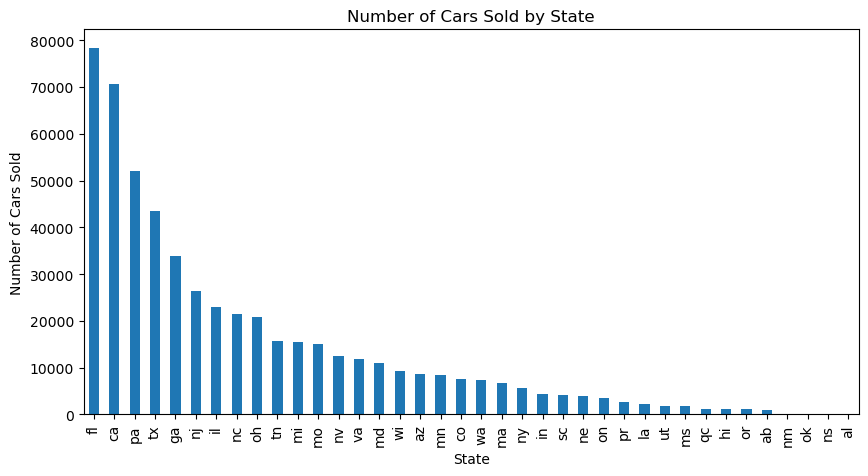

In [82]:
#Bar Graph

plt.figure(figsize=(10,5))
state_wise_counts.plot(kind='bar')
plt.title('Number of Cars Sold by State')
plt.xlabel('State')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=90)
plt.show()

In [83]:
#Top 3 highest selling states
top_3_states = state_wise_counts.head(3)
print("Top 3 highest selling states:")
print(top_3_states)

Top 3 highest selling states:
state
fl    78410
ca    70553
pa    51948
Name: count, dtype: int64


3.5 Average selling price by condition score ranges of size 5

C:\Users\HP\AppData\Local\Temp\ipykernel_11536\1679844653.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('condition_range_5')['sellingprice'].mean().plot(kind='bar', figsize=(8,4))


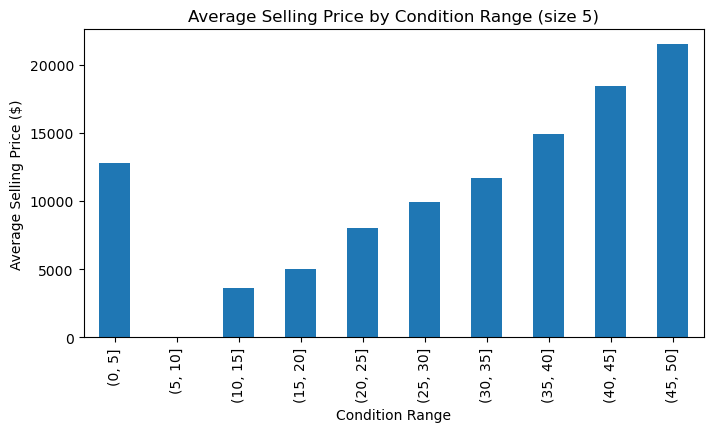

In [84]:
#Group condition into ranges of 5
df['condition_range_5'] = pd.cut(df['condition'], bins=range(0, int(df['condition'].max())+5, 5))

#Average selling price by condition range
df.groupby('condition_range_5')['sellingprice'].mean().plot(kind='bar', figsize=(8,4))

plt.title('Average Selling Price by Condition Range (size 5)')
plt.xlabel('Condition Range')
plt.ylabel('Average Selling Price ($)')
plt.show()

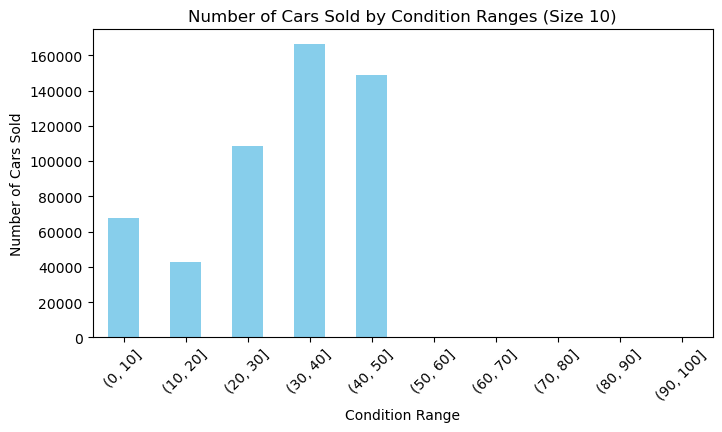

In [85]:
#Grouping condition into bins of size 10
df['condition_range'] = pd.cut(df['condition'], bins=range(0, 110, 10))

#Count cars in each range
condition_counts = df['condition_range'].value_counts().sort_index()

#Plot bar chart
plt.figure(figsize=(8,4))
condition_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Cars Sold by Condition Ranges (Size 10)')
plt.xlabel('Condition Range')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

3.7 Distribution of car selling prices grouped by color

C:\Users\HP\AppData\Local\Temp\ipykernel_11536\3843486076.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=colors)


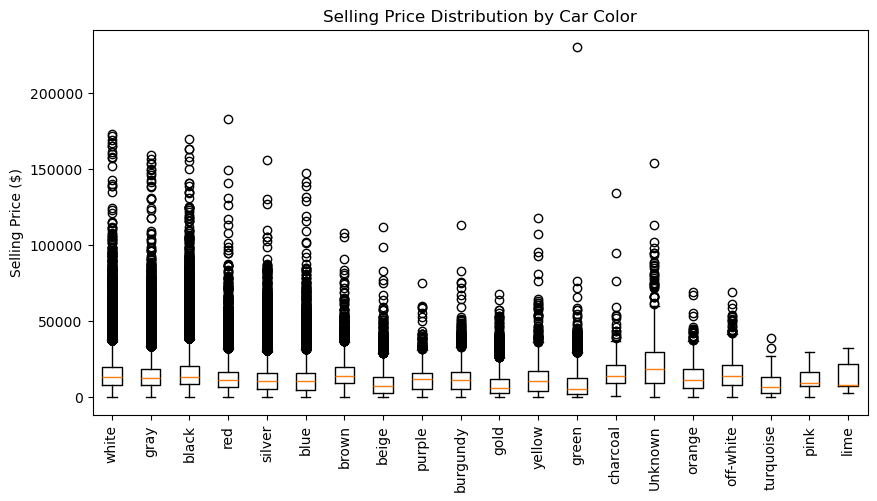

In [86]:
#Group data by color
colors = df['color'].dropna().unique()
data = [df[df['color'] == c]['sellingprice'] for c in colors]

#Create the box plot
plt.figure(figsize=(10,5))
plt.boxplot(data, labels=colors)
plt.xticks(rotation=90)  # Rotate color labels
plt.title('Selling Price Distribution by Car Color')
plt.ylabel('Selling Price ($)')
plt.show()